In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
sal=pd.read_csv("salary1.csv")

In [4]:
sal.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1032 non-null   int64 
 1   age             1032 non-null   int64 
 2   Workclass       1032 non-null   object
 3   fnlwgt          1032 non-null   int64 
 4   education       1032 non-null   object
 5   education-num   1032 non-null   int64 
 6   marital-status  1032 non-null   object
 7   occupation      1032 non-null   object
 8   relationship    1032 non-null   object
 9   race            1032 non-null   object
 10  sex             1032 non-null   object
 11  capital-gain    1032 non-null   int64 
 12  capital-loss    1032 non-null   int64 
 13  hours-per-week  1032 non-null   int64 
 14  native-country  1032 non-null   object
 15  Income          1032 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


In [6]:
sal.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
column=sal.columns

In [12]:
for col in column:
    print(col)
    print(sal[col].unique())

Unnamed: 0
[   0    1    2 ... 1117 1118 1119]
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78]
Workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc']
fnlwgt
[ 77516  83311 215646 ... 227644 205267 288020]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Cr

In [14]:
sal_num=sal.select_dtypes(["int64","float64"])

In [15]:
sal_cat=sal.select_dtypes(["object"])

In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for col in sal_cat:
    le=LabelEncoder()
    sal_cat[col]=le.fit_transform(sal_cat[col])

In [20]:
sal_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       1032 non-null   int32
 1   education       1032 non-null   int32
 2   marital-status  1032 non-null   int32
 3   occupation      1032 non-null   int32
 4   relationship    1032 non-null   int32
 5   race            1032 non-null   int32
 6   sex             1032 non-null   int32
 7   native-country  1032 non-null   int32
dtypes: int32(8)
memory usage: 32.4 KB


In [22]:
sal_new=pd.concat([sal_cat,sal_num],axis=1)

In [23]:
sal_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,0,39,77516,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,1,50,83311,13,0,0,13,0
2,2,11,0,5,1,4,1,28,2,38,215646,9,0,0,40,0
3,2,1,2,5,0,2,1,28,3,53,234721,7,0,0,40,0
4,2,9,2,9,5,2,0,4,4,28,338409,13,0,0,40,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [26]:
X=sal_new.drop("Income",axis=True)
Y=sal_new["Income"]

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [30]:
ros=RandomOverSampler()

In [31]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [32]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [33]:
pd.Series(Y_train1).value_counts()

1    540
0    540
Name: Income, dtype: int64

In [37]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print("Classification Report")
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [38]:
lr=LogisticRegression()

In [39]:
lr=create_model(lr)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       238
           1       0.77      0.76      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476

Confusion Matrix
[[184  54]
 [ 56 182]]


In [40]:
dt=DecisionTreeClassifier()

In [41]:
dt=create_model(dt)

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       238
           1       0.81      0.61      0.69       238

    accuracy                           0.73       476
   macro avg       0.75      0.73      0.73       476
weighted avg       0.75      0.73      0.73       476

Confusion Matrix
[[205  33]
 [ 94 144]]


In [42]:
dt.feature_importances_

array([0.03022663, 0.03276339, 0.27297587, 0.05868662, 0.00300999,
       0.01899491, 0.00313276, 0.00309169, 0.14175625, 0.10764254,
       0.07739484, 0.14802382, 0.03481388, 0.00695706, 0.06052974])

In [43]:
X.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Unnamed: 0', 'age',
       'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

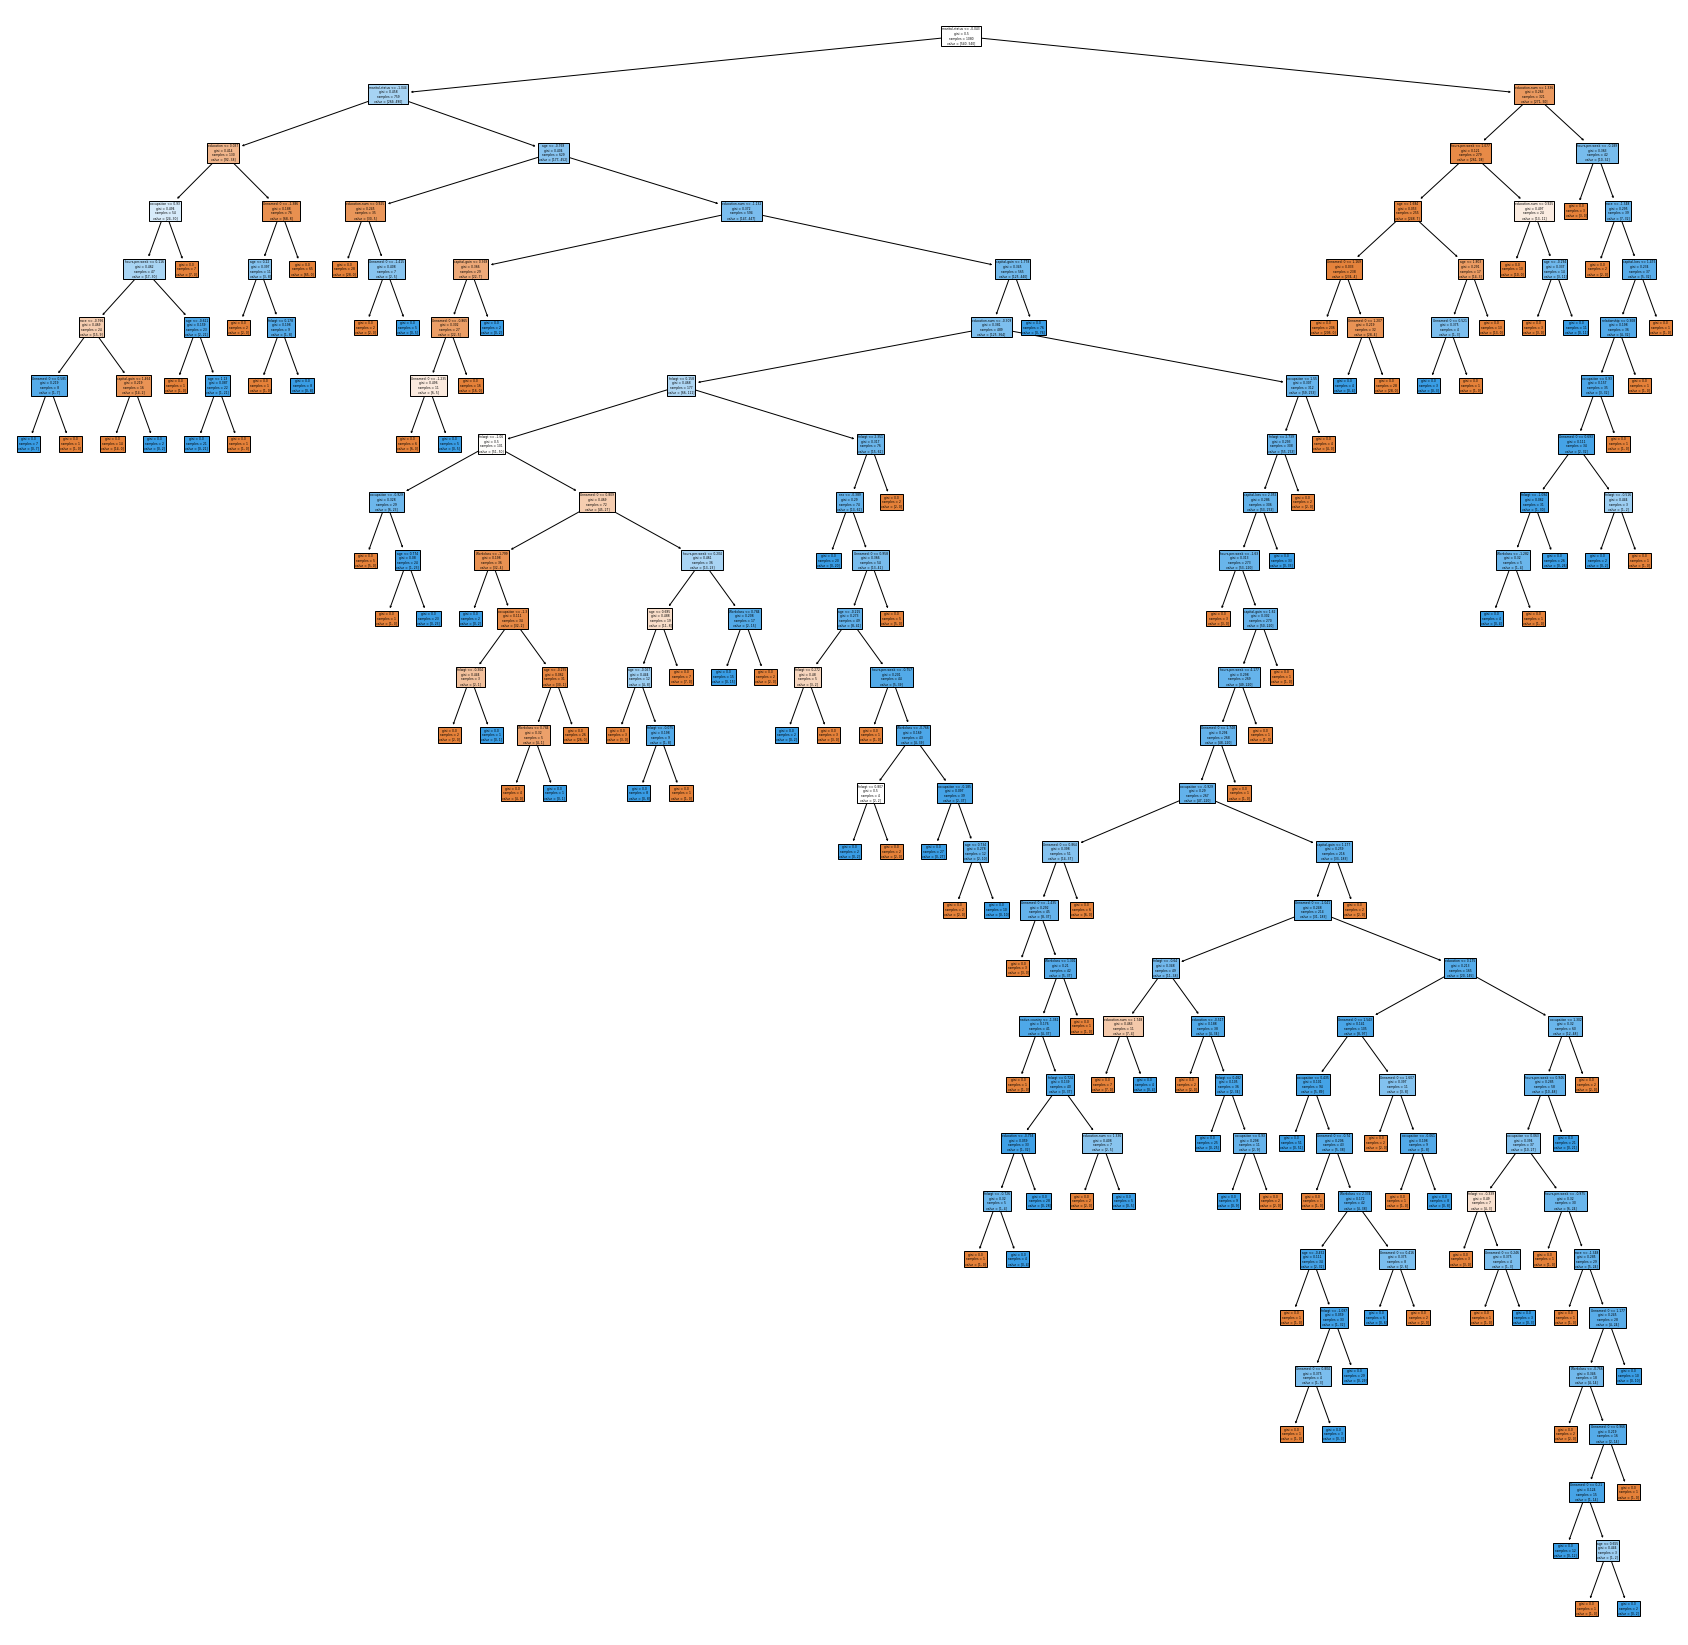

In [44]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(8,8))
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [45]:
dt1=DecisionTreeClassifier(criterion="entropy")

In [46]:
dt1=create_model(dt1)

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       238
           1       0.82      0.65      0.72       238

    accuracy                           0.75       476
   macro avg       0.76      0.75      0.75       476
weighted avg       0.76      0.75      0.75       476

Confusion Matrix
[[204  34]
 [ 84 154]]


In [47]:
dt.feature_importances_

array([0.03022663, 0.03276339, 0.27297587, 0.05868662, 0.00300999,
       0.01899491, 0.00313276, 0.00309169, 0.14175625, 0.10764254,
       0.07739484, 0.14802382, 0.03481388, 0.00695706, 0.06052974])

<Figure size 576x576 with 0 Axes>

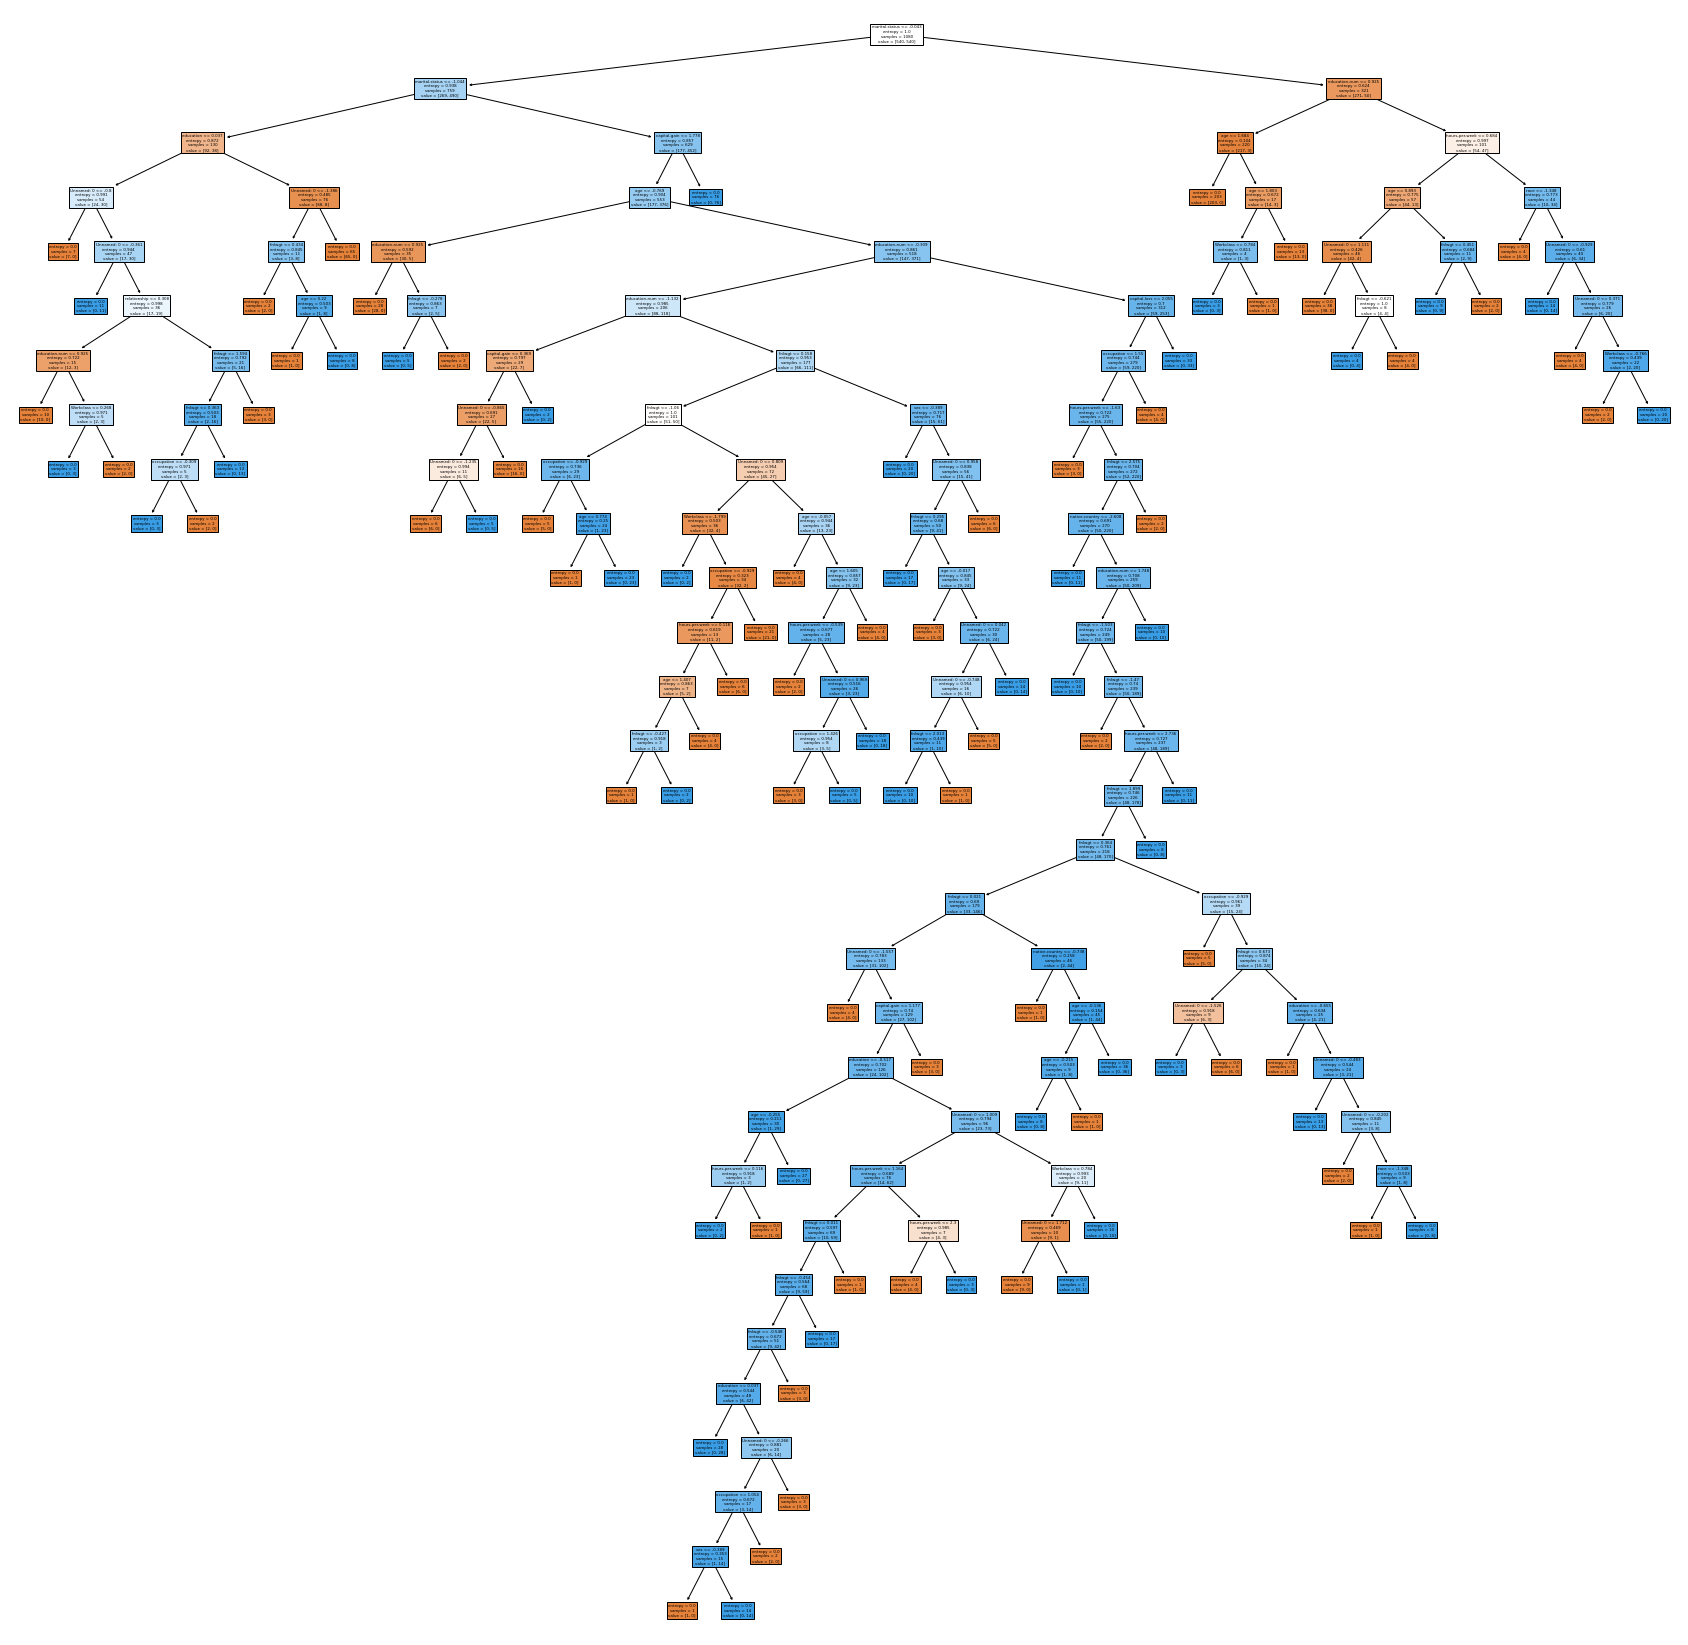

In [48]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(8,8))
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [49]:
dt2=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8)

In [50]:
dt2=create_model(dt2)

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       238
           1       0.79      0.67      0.72       238

    accuracy                           0.75       476
   macro avg       0.75      0.75      0.74       476
weighted avg       0.75      0.75      0.74       476

Confusion Matrix
[[196  42]
 [ 79 159]]


<Figure size 576x576 with 0 Axes>

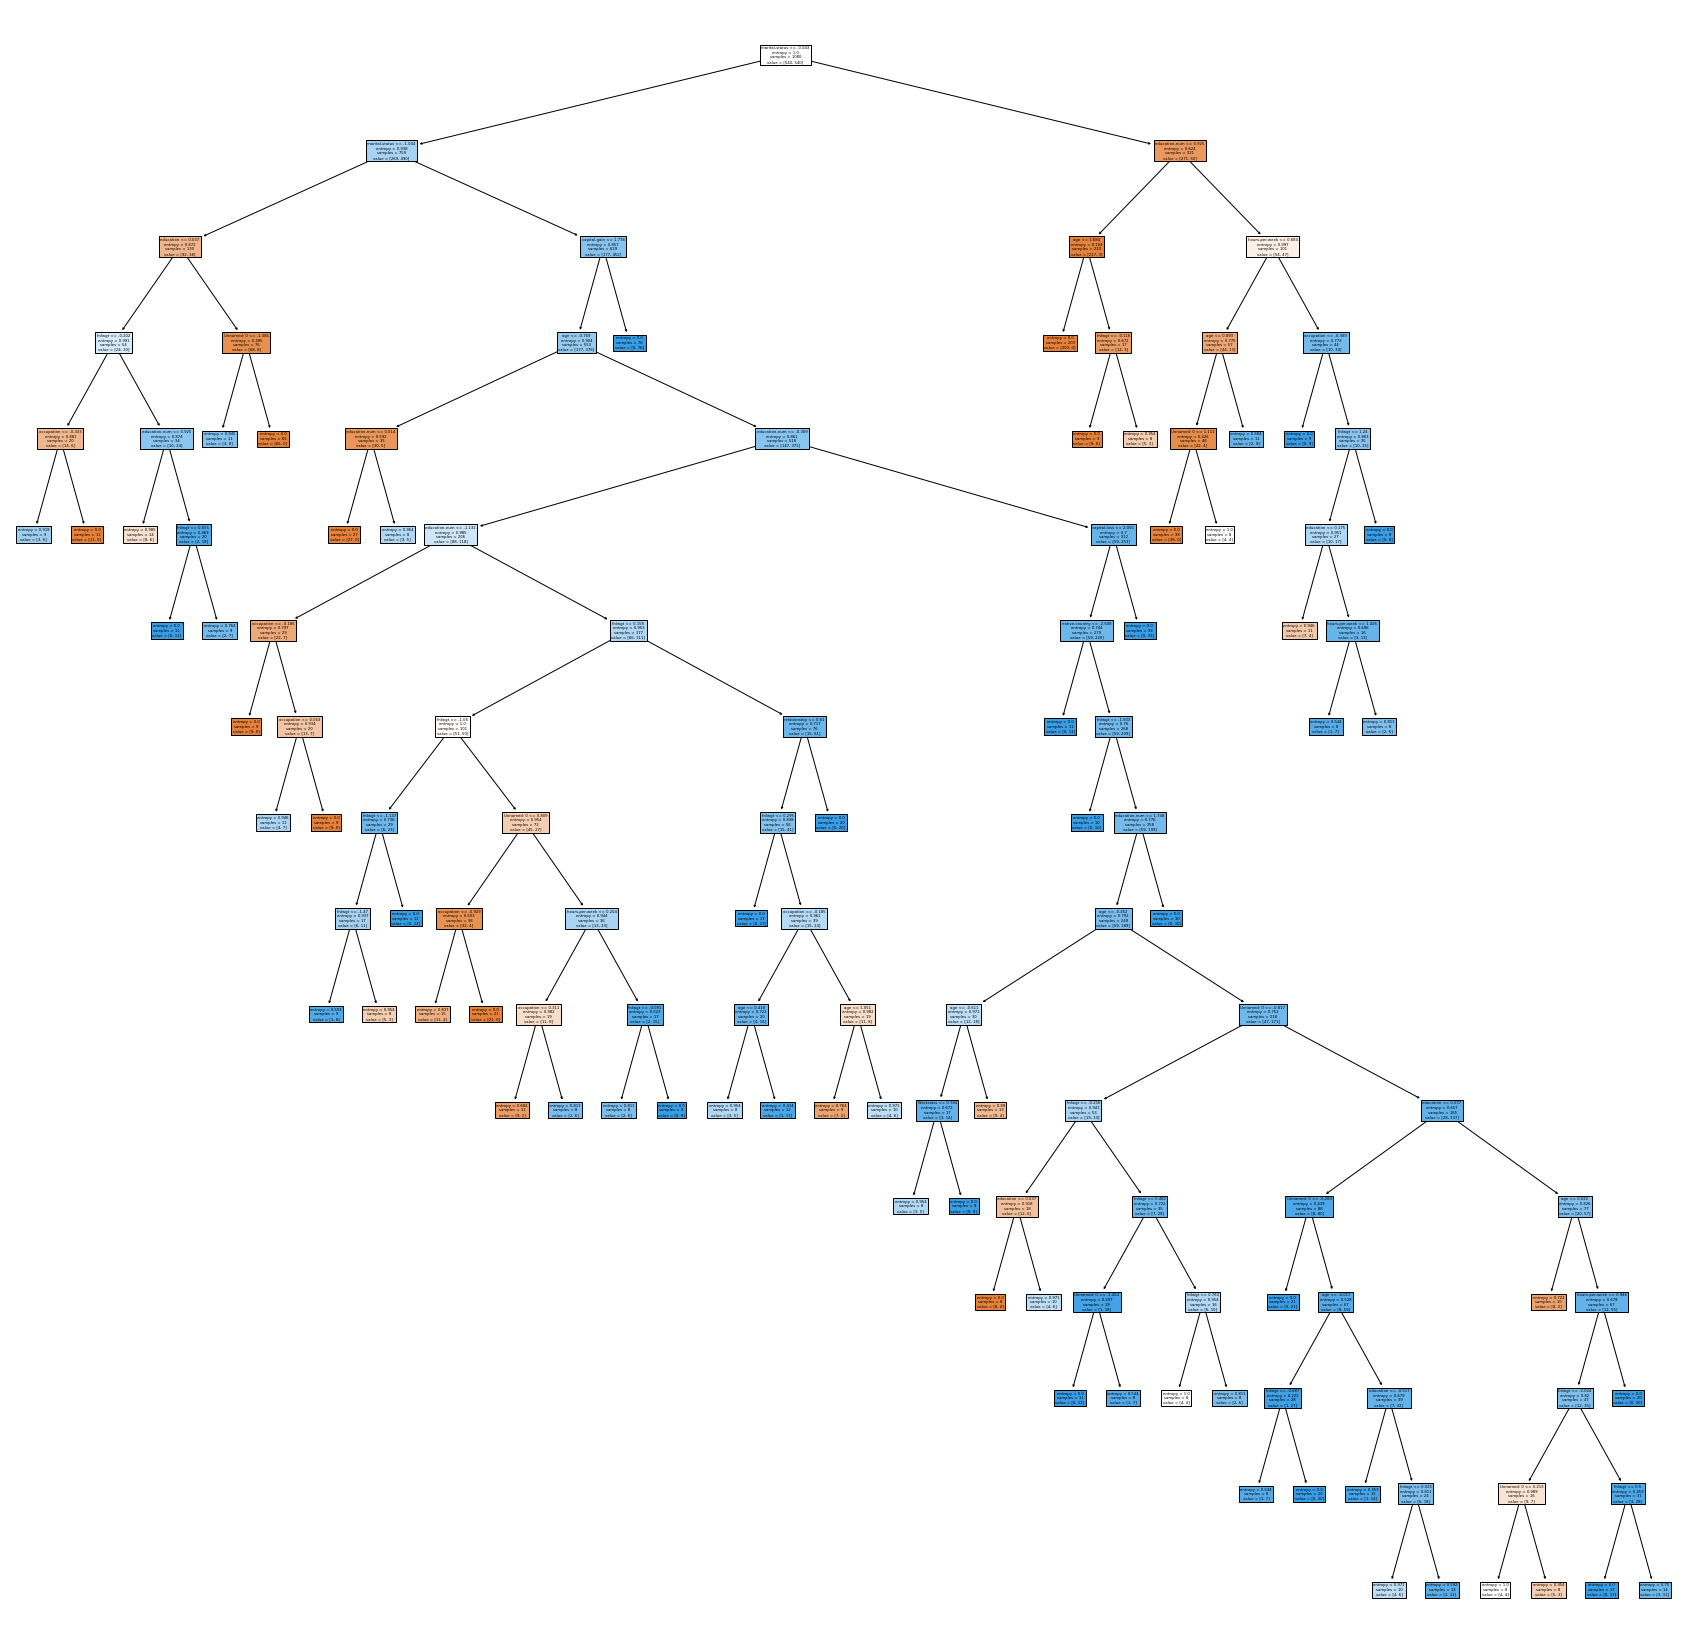

In [51]:
from sklearn import tree
plt.figure(figsize=(8,8))
features=X.columns
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [52]:
dt3=DecisionTreeClassifier(max_depth=7)

In [53]:
dt3=create_model(dt3)

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       238
           1       0.82      0.73      0.77       238

    accuracy                           0.79       476
   macro avg       0.79      0.79      0.79       476
weighted avg       0.79      0.79      0.79       476

Confusion Matrix
[[200  38]
 [ 64 174]]


<Figure size 576x576 with 0 Axes>

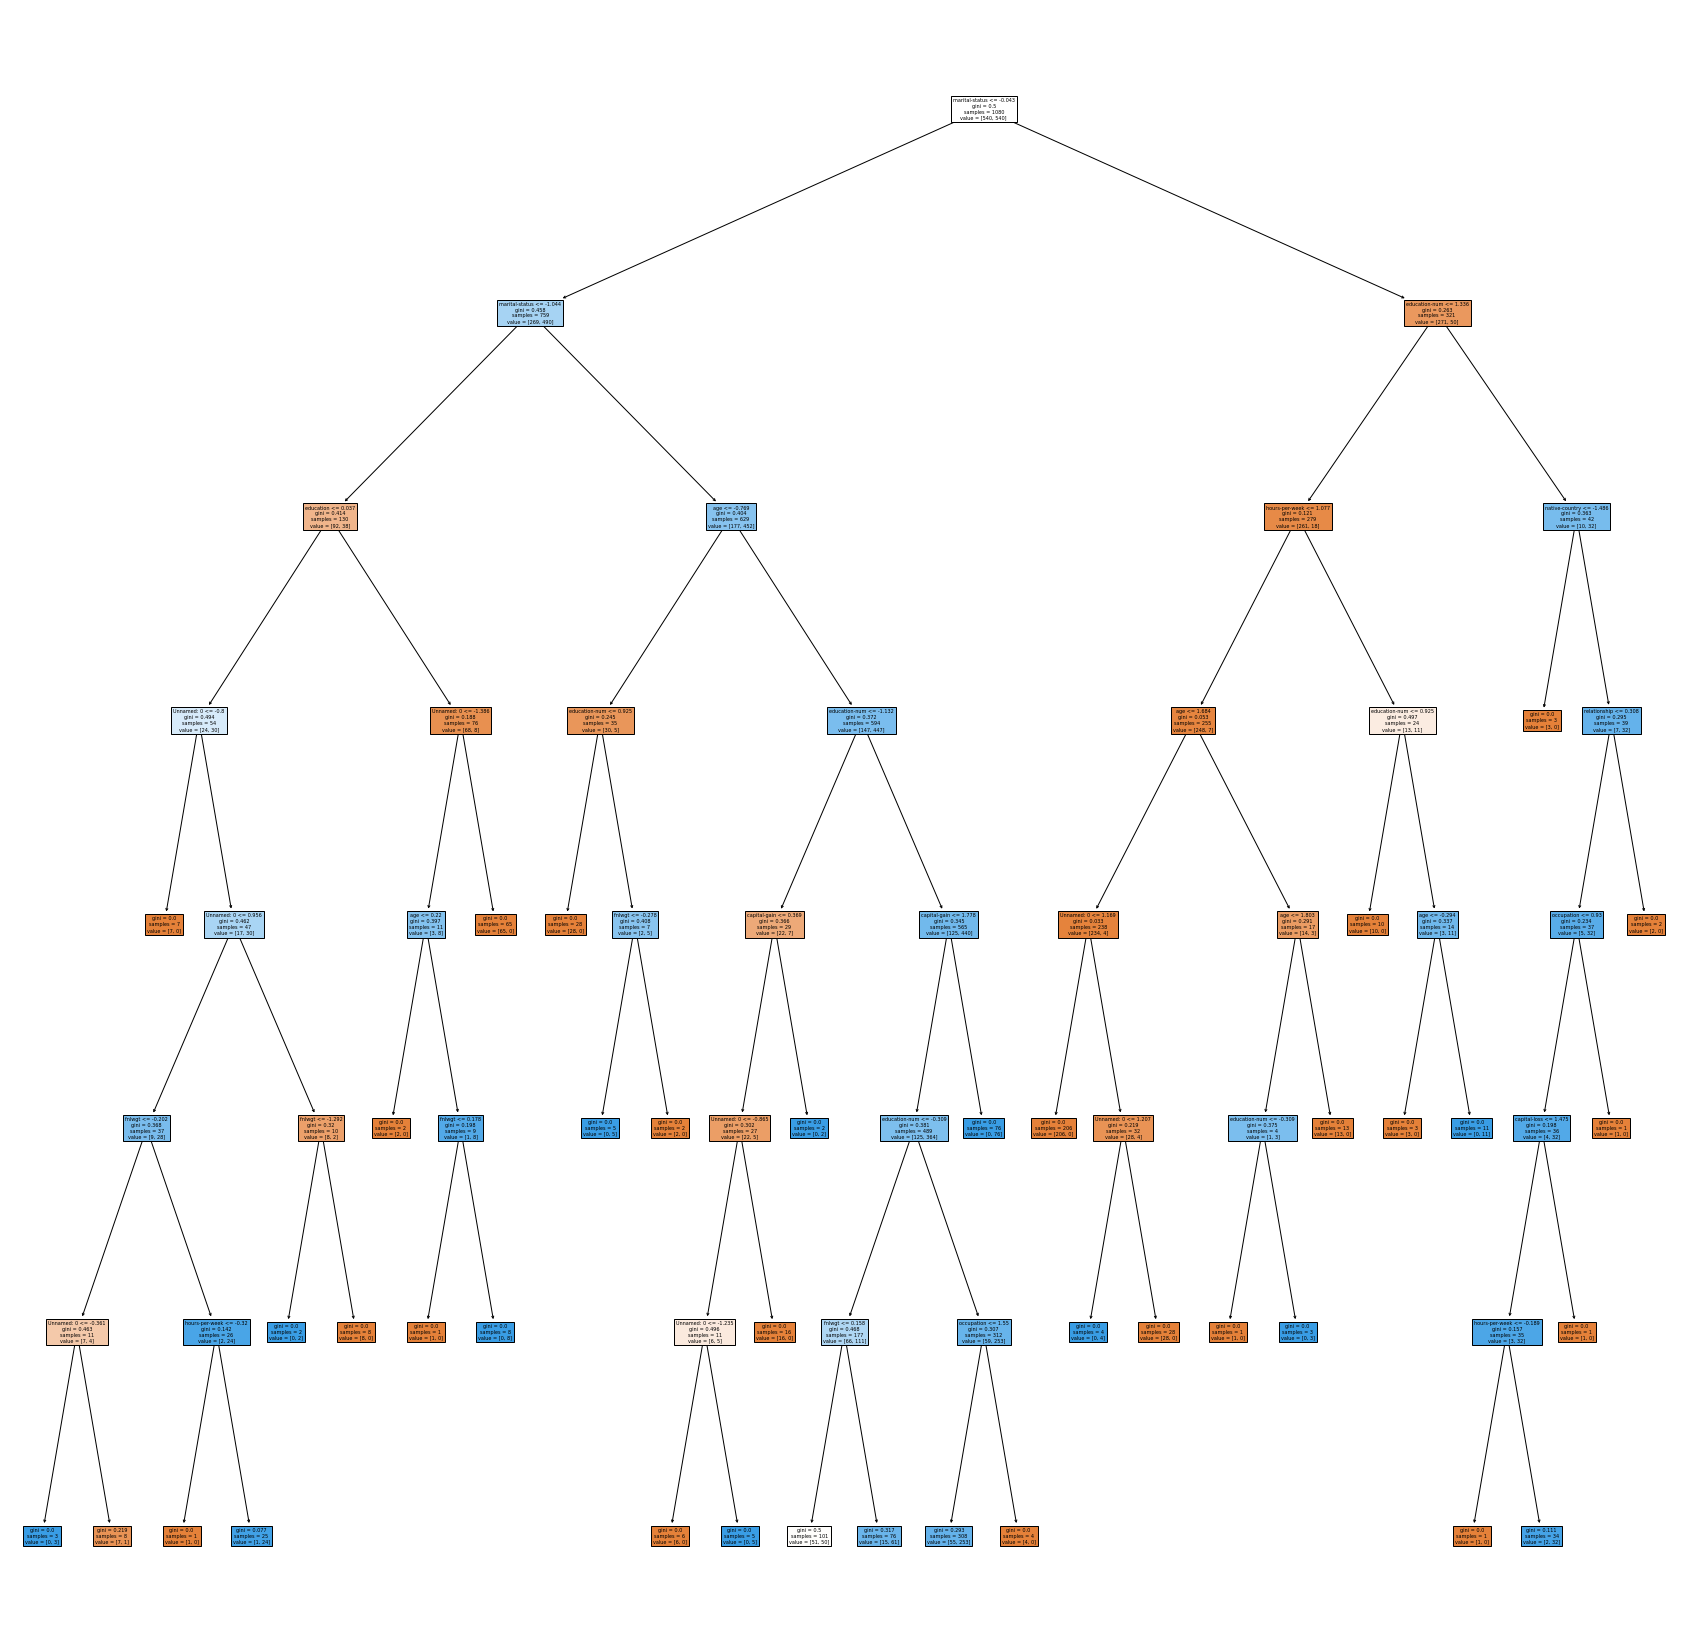

In [54]:
features=X.columns
plt.figure(figsize=(8,8))
fig=plt.figure(figsize=(30,30))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [55]:
dt4=DecisionTreeClassifier(min_samples_leaf=8)

In [56]:
dt4=create_model(dt4)

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       238
           1       0.78      0.65      0.71       238

    accuracy                           0.73       476
   macro avg       0.74      0.73      0.73       476
weighted avg       0.74      0.73      0.73       476

Confusion Matrix
[[194  44]
 [ 84 154]]


In [57]:
bc1=BaggingClassifier(LogisticRegression(),max_samples=75,random_state=1,n_estimators=10)

In [58]:
bc1=create_model(bc1)

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       238
           1       0.78      0.72      0.75       238

    accuracy                           0.76       476
   macro avg       0.76      0.76      0.76       476
weighted avg       0.76      0.76      0.76       476

Confusion Matrix
[[190  48]
 [ 66 172]]


In [59]:
bc2=BaggingClassifier(LogisticRegression(),max_samples=500,random_state=1,n_estimators=10,)

In [60]:
bc2=create_model(bc2)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       238
           1       0.77      0.78      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476

Confusion Matrix
[[183  55]
 [ 53 185]]


In [61]:
bc3=BaggingClassifier(LogisticRegression(),max_samples=75,random_state=1,bootstrap=False,n_estimators=10)

In [71]:
bc3=create_model(bc3)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       238
           1       0.82      0.76      0.79       238

    accuracy                           0.80       476
   macro avg       0.80      0.80      0.80       476
weighted avg       0.80      0.80      0.80       476

Confusion Matrix
[[197  41]
 [ 56 182]]


In [72]:
rfs=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)

In [73]:
rfs=create_model(rfs)

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       238
           1       0.90      0.58      0.71       238

    accuracy                           0.76       476
   macro avg       0.80      0.76      0.75       476
weighted avg       0.80      0.76      0.75       476

Confusion Matrix
[[223  15]
 [ 99 139]]


In [74]:
ada=AdaBoostClassifier(n_estimators=75)

In [75]:
ada=create_model(ada)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       238
           1       0.83      0.76      0.80       238

    accuracy                           0.80       476
   macro avg       0.81      0.80      0.80       476
weighted avg       0.81      0.80      0.80       476

Confusion Matrix
[[201  37]
 [ 56 182]]


In [76]:
gb=GradientBoostingClassifier(n_estimators=75)

In [77]:
gb=create_model(gb)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       238
           1       0.83      0.79      0.81       238

    accuracy                           0.82       476
   macro avg       0.82      0.82      0.82       476
weighted avg       0.82      0.82      0.82       476

Confusion Matrix
[[199  39]
 [ 49 189]]


In [78]:
xgc=XGBClassifier(n_estimators=100,reg_alpha=1)

In [79]:
xgc=create_model(xgc)

[00:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       238
           1       0.86      0.70      0.77       238

    accuracy                           0.79       476
   macro avg       0.81      0.79      0.79       476
weighted avg       0.81      0.79      0.79       476

Confusion Matrix
[[212  26]
 [ 72 166]]


In [80]:
gnb=GaussianNB()

In [81]:
gnb=create_model(gnb)

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.89      0.75       238
           1       0.83      0.50      0.62       238

    accuracy                           0.70       476
   macro avg       0.73      0.70      0.68       476
weighted avg       0.73      0.70      0.68       476

Confusion Matrix
[[213  25]
 [120 118]]


In [82]:
knn=KNeighborsClassifier(metric="minkowski",p=2,n_neighbors=8)

In [83]:
knn=create_model(knn)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       238
           1       0.77      0.61      0.68       238

    accuracy                           0.71       476
   macro avg       0.72      0.71      0.71       476
weighted avg       0.72      0.71      0.71       476

Confusion Matrix
[[194  44]
 [ 94 144]]


In [84]:
svm=LinearSVC(random_state=1)

In [85]:
svm=create_model(svm)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       238
           1       0.77      0.76      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476

Confusion Matrix
[[183  55]
 [ 56 182]]


In [86]:
svm1=LinearSVC(random_state=1,C=0.08)

In [87]:
svm1=create_model(svm1)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       238
           1       0.77      0.76      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476

Confusion Matrix
[[183  55]
 [ 56 182]]


In [88]:
poly_svc=SVC(random_state=1,kernel="poly")

In [89]:
poly_svc=create_model(poly_svc)

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       238
           1       0.82      0.63      0.71       238

    accuracy                           0.75       476
   macro avg       0.76      0.75      0.74       476
weighted avg       0.76      0.75      0.74       476

Confusion Matrix
[[204  34]
 [ 87 151]]


In [90]:
rbf=SVC(random_state=1,kernel="rbf")

In [91]:
rbf=create_model(rbf)

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       238
           1       0.80      0.76      0.78       238

    accuracy                           0.78       476
   macro avg       0.78      0.78      0.78       476
weighted avg       0.78      0.78      0.78       476

Confusion Matrix
[[193  45]
 [ 58 180]]
